In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn import preprocessing
import datetime

In [17]:
# 通过python console查看维度
features = pd.read_csv('temps.csv')

# 看看数据长什么样子
print(features.head())

   year  month  day  week  temp_2  temp_1  average  actual  friend
0  2016      1    1   Fri      45      45     45.6      45      29
1  2016      1    2   Sat      44      45     45.7      44      61
2  2016      1    3   Sun      45      44     45.8      41      56
3  2016      1    4   Mon      44      41     45.9      40      53
4  2016      1    5  Tues      41      40     46.0      44      41


In [18]:
features.shape

(348, 9)

In [19]:
# 分别得到年，月，日
years = features['year']
months = features['month']
days = features['day']
years.shape
years[:5]

#months
#days

0    2016
1    2016
2    2016
3    2016
4    2016
Name: year, dtype: int64

In [20]:
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
print (dates[:5])
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates[:5] 

['2016-1-1', '2016-1-2', '2016-1-3', '2016-1-4', '2016-1-5']


[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

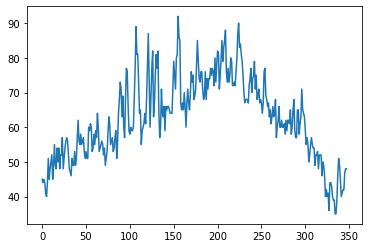

(348, 14)

In [77]:
features = pd.read_csv('temps.csv')
features = pd.get_dummies(features)
features_copy = features

# 标签
labels = np.array(features['actual'])
# 在特征中去掉标签
features = features.drop('actual', axis=1)
features
# 名字单独保存一下，以备后患
feature_list = list(features.columns)
#print (feature_list)

features = np.array(features)
features.shape
plt.plot(features[:,3])
plt.show()
features.shape

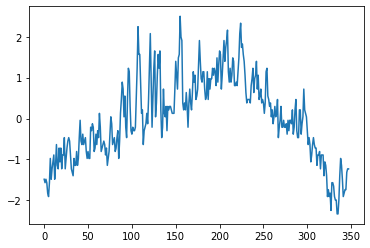

In [42]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)
#print (input_features[:,1])
plt.plot(input_features[:,3])
plt.show()

# 构建网络模型

In [52]:
x = torch.tensor(input_features, dtype = float)##348 x 14
y = torch.tensor(labels, dtype = float)

#权重参数初始化
weights = torch.randn((14,128),dtype = float, requires_grad = True)
biases = torch.randn(128, dtype = float, requires_grad = True)
weights2 = torch.randn((128,1),dtype = float, requires_grad = True)
biases2 = torch.randn(1,dtype = float, requires_grad = True)

learning_rate = 0.001
losses = []

for i in range(1000):
    # 计算隐层
    hidden = x.mm(weights) + biases
    hidden = torch.relu(hidden)
    predictions = hidden.mm(weights2) + biases2
    
    loss = torch.mean((predictions - y)** 2)
    losses.append(loss.data.numpy())
    
    #
    if i %100 == 0:
        print('loss:', loss)
    loss.backward()
    
    # 更新参数
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases2.data.add_(- learning_rate * biases2.grad.data)

    # 每次迭代都得记得清空
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()

loss: tensor(2832.4685, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(153.3947, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(147.0068, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(144.6678, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(143.2943, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(142.3868, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.7465, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.2560, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.8792, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.5938, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [96]:
input_size = input_features.shape[1]
batch_size = 16
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, 128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128,1))

cost = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(my_nn.parameters(),lr = 0.001)
len(input_features)
input_features.shape

(348, 14)

In [97]:
for i in range(100):
    batch_loss = []
    # MINI-Batch方法来进行训练
    for start in range(0, len(input_features), batch_size):
        end = start + batch_size if start + batch_size < len(input_features) else len(input_features)
        xx = torch.tensor(input_features[start:end], dtype=torch.float, requires_grad=True)
        yy = torch.tensor(labels[start:end], dtype=torch.float, requires_grad=True)
        prediction = my_nn(xx)
        # 降为一维，否则loss会告警
        prediction = prediction.view(-1)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())

    # 打印损失
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 3877.4875


In [98]:
x = torch.tensor(input_features, dtype = torch.float)
predict = my_nn(x).data.numpy()

In [106]:
features = pd.read_csv('temps.csv')
features = pd.get_dummies(features)

years = features['year']
months = features['month']
days = features['day']
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame({'date': dates, 'actual': labels})
predictions_data = pd.DataFrame({'date': dates, 'prediction': predict.reshape(-1)})
true_data

,date,actual
0,2016-01-01,45
1,2016-01-02,44
2,2016-01-03,41
3,2016-01-04,40
4,2016-01-05,44
...,...,...
343,2016-12-27,47
344,2016-12-28,48
345,2016-12-29,48
346,2016-12-30,57


In [ ]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label='actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label='prediction')
#plt.xticks(rotation='60')
plt.legend()

# 图名
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (F)')
plt.title('Actual and Predicted Values')
plt.show()